# TASK-3 Exploratory Data Analysis - Retail

**Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’**

**By Swati Singh**



In [1]:

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv("SampleSuperstore.csv")

In [3]:
# Initial exploration of the dataset
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())


First 5 rows of the dataset:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  21

In [4]:

# Checking for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())
data.drop_duplicates(keep="first", inplace=True)


Number of duplicate rows: 17


In [5]:
# Descriptive statistics of numerical features
print("\nDescriptive statistics of numerical features:")
print(data.describe())


Descriptive statistics of numerical features:
        Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


Missing values in numeric data:
 Postal Code    0
Sales          0
Quantity       0
Discount       0
Profit         0
dtype: int64

Correlation matrix:
              Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000


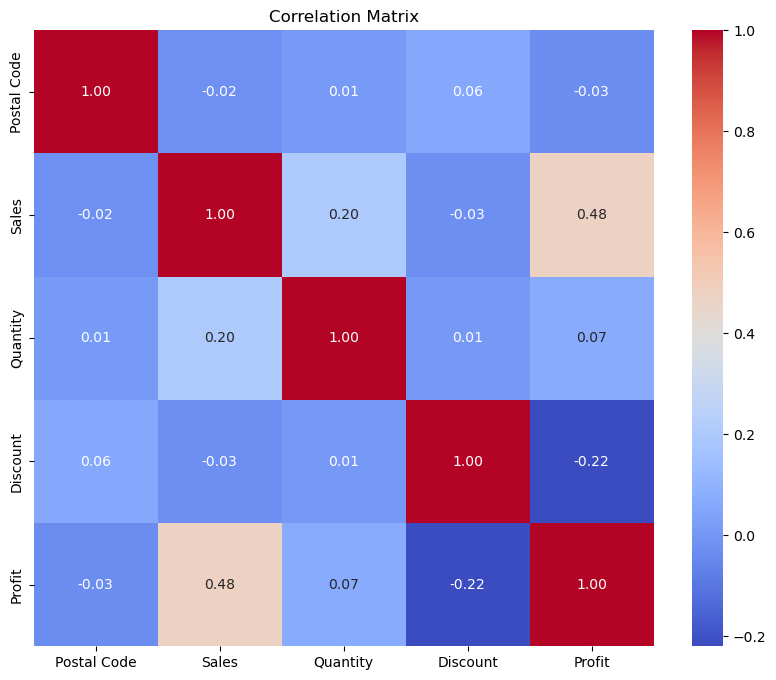

In [6]:
# Remove non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Check for missing values in the numeric data
print("Missing values in numeric data:\n", numeric_data.isnull().sum())

# Drop rows with missing values
numeric_data.dropna(inplace=True)

# Correlation analysis
correlation = numeric_data.corr()
print("\nCorrelation matrix:\n", correlation)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

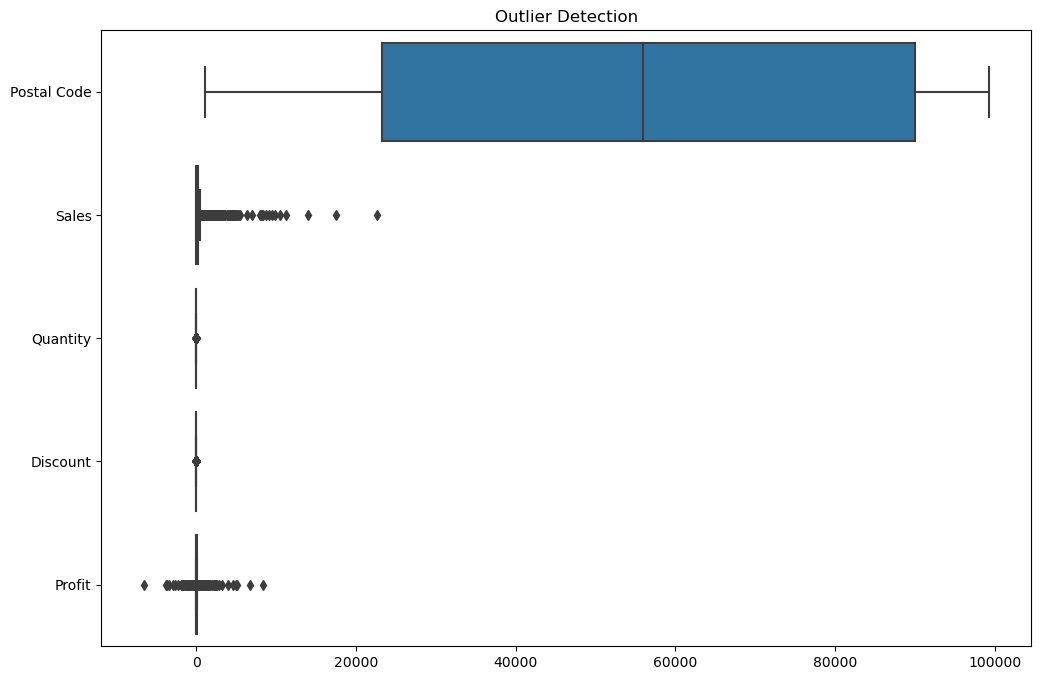

In [7]:
# Outlier detection using boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=[np.number]), orient="h")
plt.title("Outlier Detection")
plt.show()

In [8]:
# Removing outliers
def remove_outlier(dataset, k=3.33):
    for col in dataset.columns:
        if dataset[col].dtype == "int64" or dataset[col].dtype == "float64":
            mean = dataset[col].mean()
            std = dataset[col].std()
            outlier = [i for i in dataset[col] if (i > mean - k * std)]
            outlier = [i for i in outlier if (i < mean + k * std)]
            dataset = dataset.loc[dataset[col].isin(outlier)]
    return dataset

data = remove_outlier(data, k=3.33)

In [9]:
# Further exploration of the cleaned dataset
print("\nShape of cleaned dataset:", data.shape)
print("\nInformation of cleaned dataset:")
print(data.info())


Shape of cleaned dataset: (9644, 13)

Information of cleaned dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 9644 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9644 non-null   object 
 1   Segment       9644 non-null   object 
 2   Country       9644 non-null   object 
 3   City          9644 non-null   object 
 4   State         9644 non-null   object 
 5   Postal Code   9644 non-null   int64  
 6   Region        9644 non-null   object 
 7   Category      9644 non-null   object 
 8   Sub-Category  9644 non-null   object 
 9   Sales         9644 non-null   float64
 10  Quantity      9644 non-null   int64  
 11  Discount      9644 non-null   float64
 12  Profit        9644 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB
None


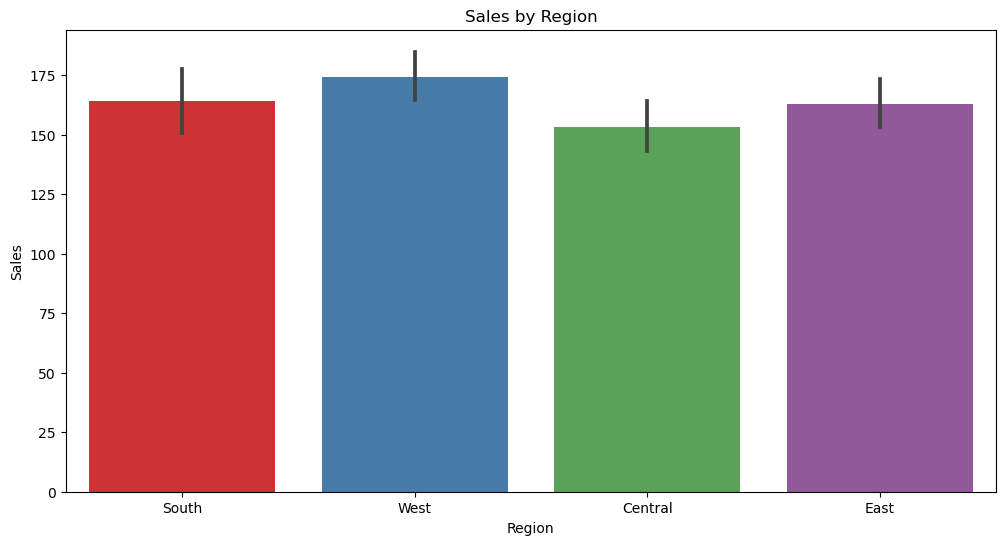

In [10]:
# Visualizing Sales by Region
plt.figure(figsize=(12, 6))
sns.barplot(x="Region", y="Sales", data=data, palette="Set1")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

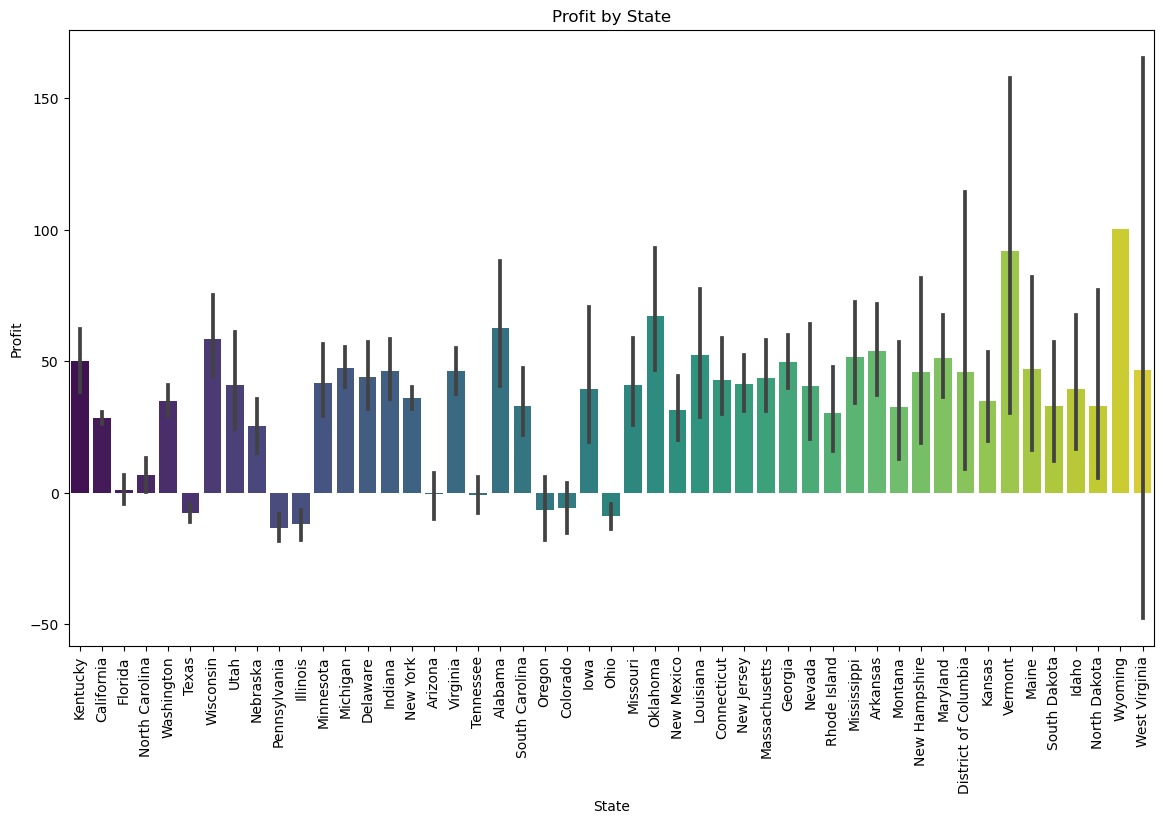

In [11]:
# Visualizing Profit by State
plt.figure(figsize=(14, 8))
sns.barplot(x="State", y="Profit", data=data, palette="viridis")
plt.title("Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()


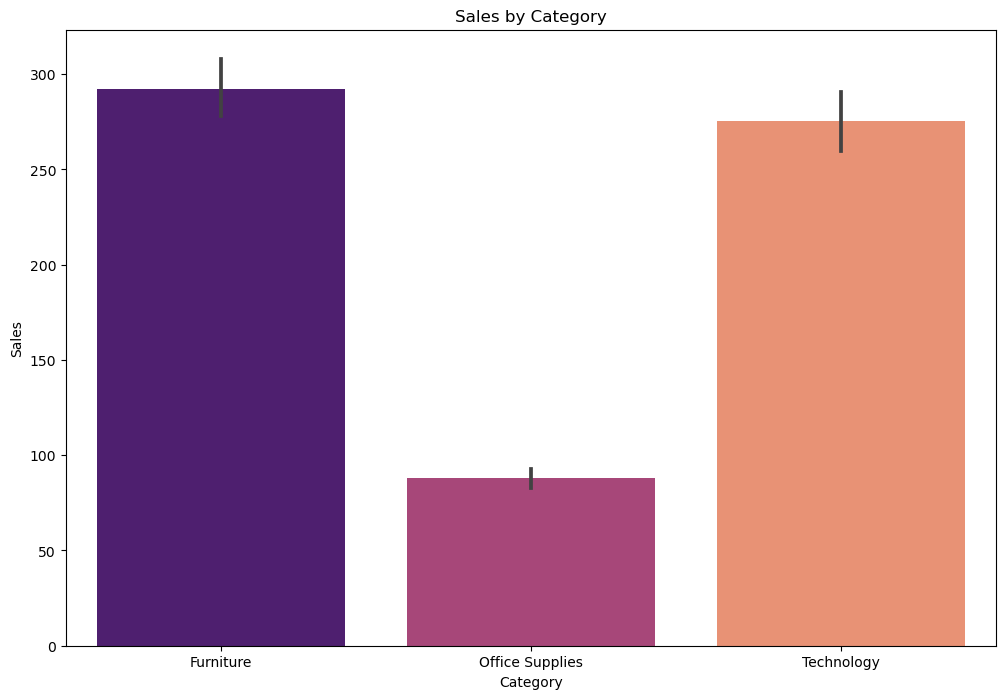

In [12]:
# Visualizing Sales and Profit by Category
plt.figure(figsize=(12, 8))
sns.barplot(x="Category", y="Sales", data=data, palette="magma")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

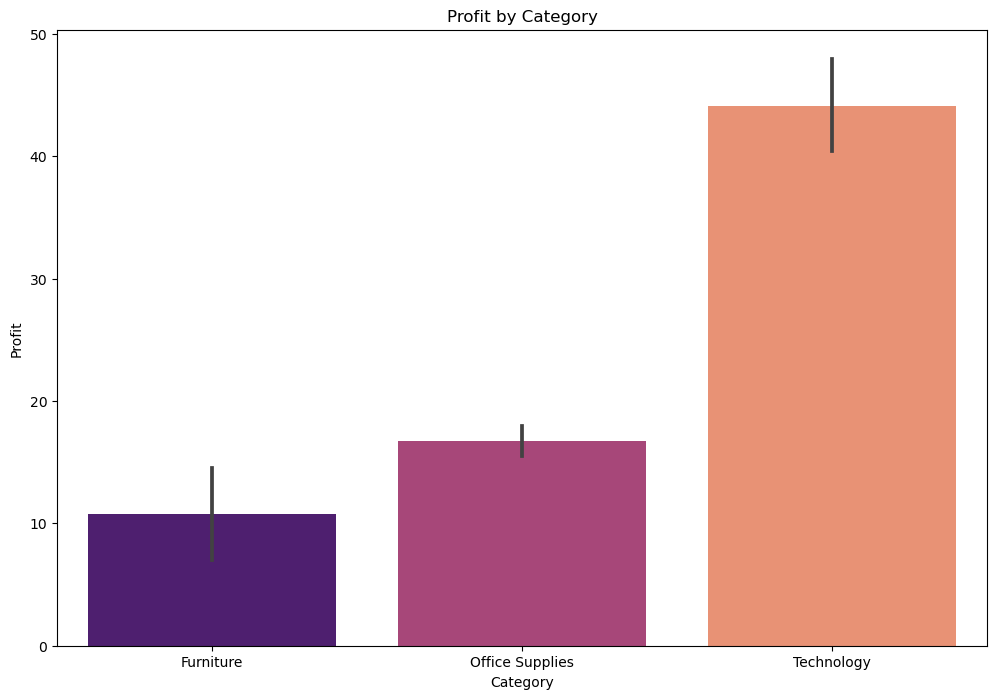

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Category", y="Profit", data=data, palette="magma")
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

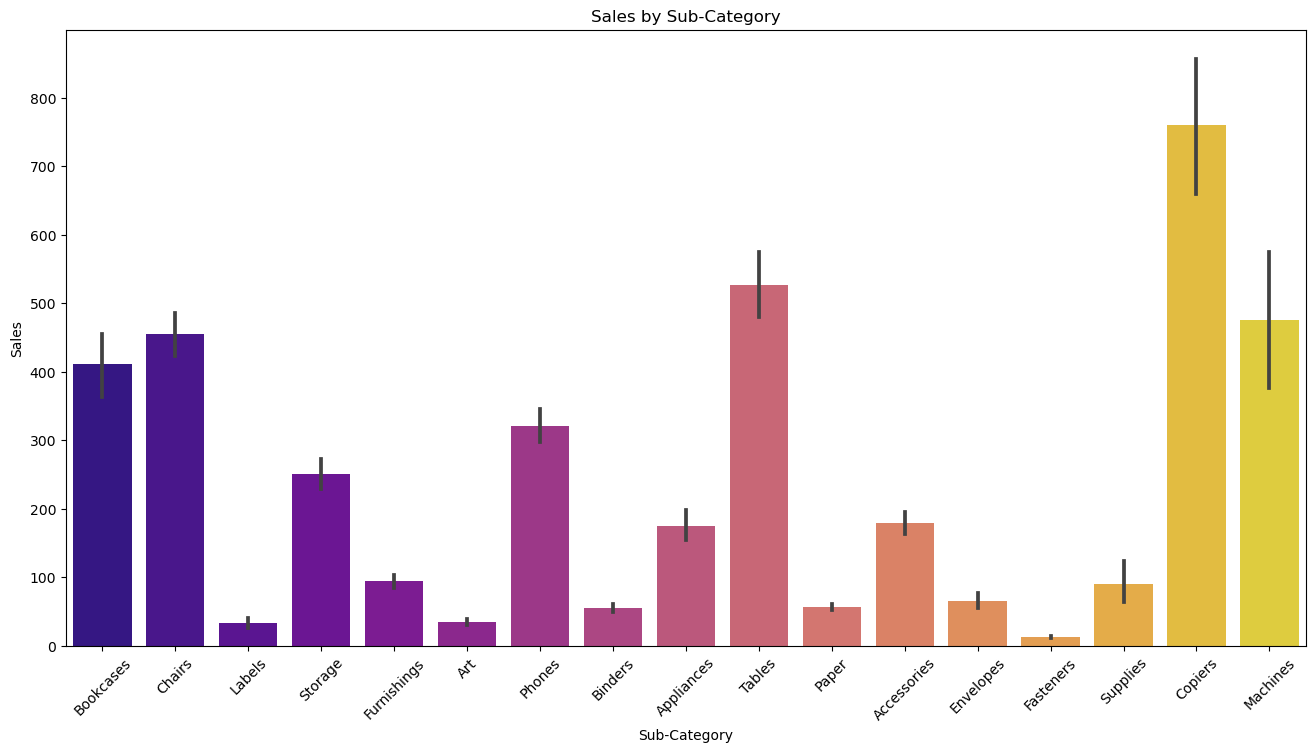

In [14]:
# Visualizing Sales and Profit by Sub-Category
plt.figure(figsize=(16, 8))
sns.barplot(x="Sub-Category", y="Sales", data=data, palette="plasma")
plt.title("Sales by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

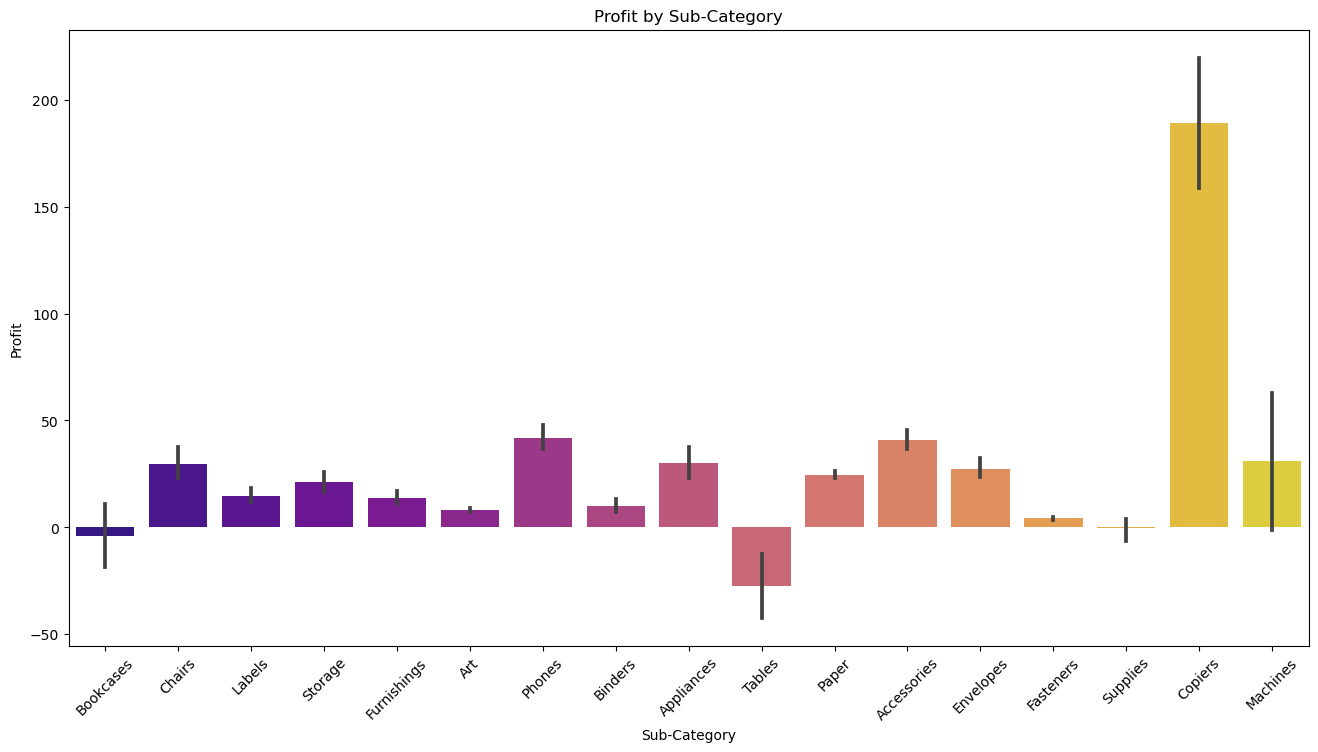

In [15]:
plt.figure(figsize=(16, 8))
sns.barplot(x="Sub-Category", y="Profit", data=data, palette="plasma")
plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Profit")
plt.xticks(rotation=45)
plt.show()